In [1]:
from svm_classifier import SVM_agent
from features import *

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch.utils.data as td
from dataset import ExtendedYaleFace
from skimage import exposure

In [2]:
# dataset
train_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=True, train=True)
test_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=True, test=True)

# agent
svm_agent = SVM_agent()

## PCA ##

Dimension of the batch data is torch.Size([1931, 1, 1024])


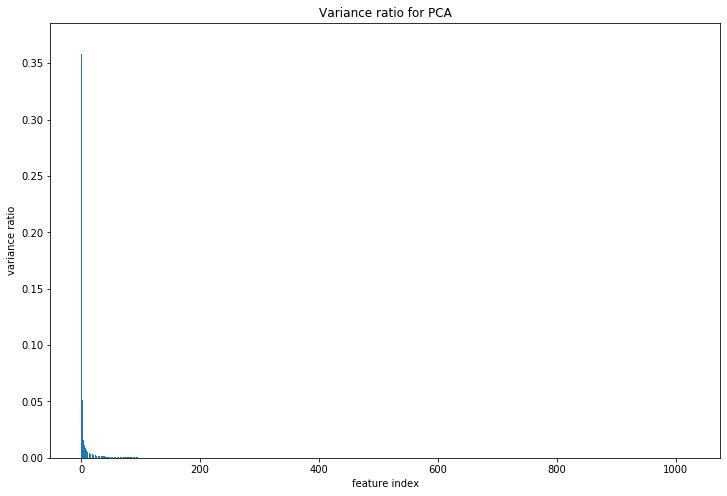

In [3]:
pca = pca_fit(train_set)

# plot variance ratio
plt.figure(figsize=(12, 8))
plt.title("Variance ratio for PCA")
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel("feature index")
plt.ylabel("variance ratio")
plt.show()

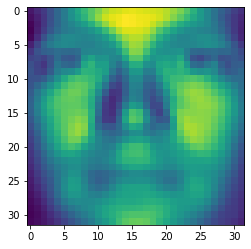

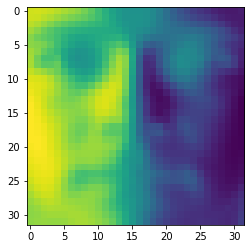

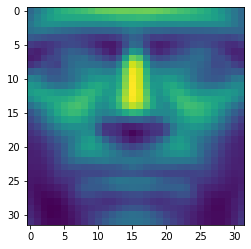

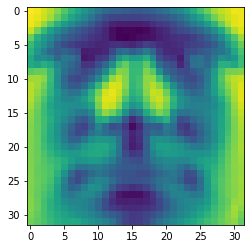

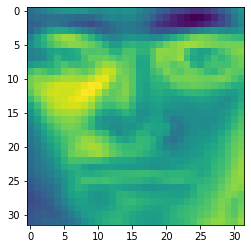

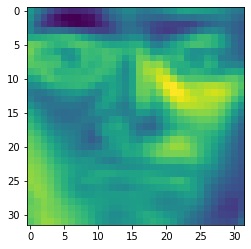

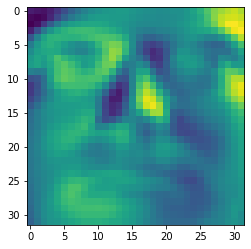

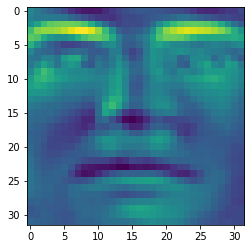

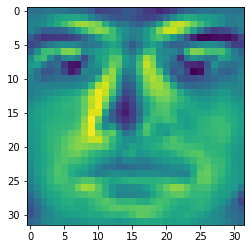

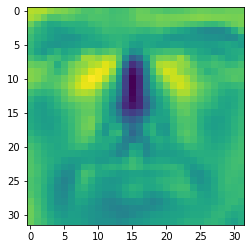

In [4]:
eigenfaces = pca.components_.reshape(-1, 32, 32)

for i in range(10):
    plt.imshow(eigenfaces[i])
    plt.show()

In [5]:
pca_train = pca_transform(pca, train_set)

svm_agent.train(pca_train, train_set.labels)

Dimension of the batch data is torch.Size([1931, 1, 1024])


/home/zzy/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
pca_test = pca_transform(pca, test_set)
svm_agent.test(pca_test, test_set.labels)

Dimension of the batch data is torch.Size([483, 1, 1024])
Accuracy:0.968944099378882


In [7]:
svm_agent.hyper_tune(pca_train, train_set.labels)
svm_agent.test(pca_test, test_set.labels)

Best parameters: {'C': 1}
Accuracy:0.968944099378882


/home/zzy/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# LDA##

In [8]:
# dataset
train_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=False, train=True)
test_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=False, test=True)

svm_agent.reset()

Dimension of the batch data is torch.Size([1931, 1, 1024])


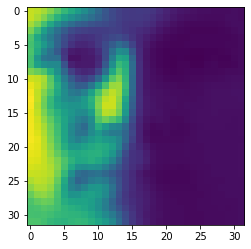

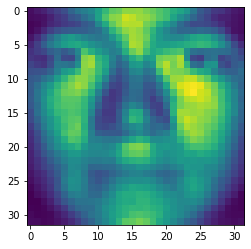

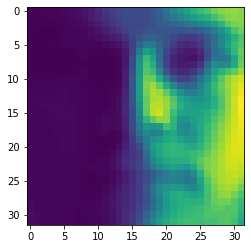

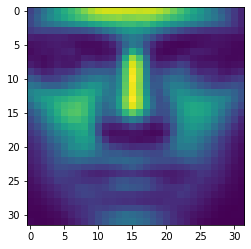

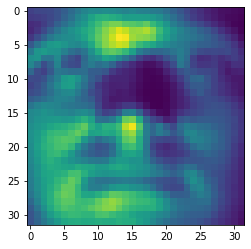

In [9]:
lda = lda_fit(train_set)

eigenfaces = lda.components_.reshape(-1, 32, 32)

for i in range(5):
    plt.imshow(eigenfaces[i])
    plt.show()

In [10]:
lda_train = lda_transform(lda, train_set)
lda_test = lda_transform(lda, test_set)

Dimension of the batch data is torch.Size([1931, 1, 1024])
Dimension of the batch data is torch.Size([483, 1, 1024])


In [11]:
svm_agent.train(lda_train, train_set.labels)

In [12]:
svm_agent.test(lda_test, test_set.labels)

Accuracy:0.047619047619047616


In [13]:
svm_agent.hyper_tune(lda_train, train_set.labels)
svm_agent.test(lda_test, test_set.labels)

Best parameters: {'C': 100}
Accuracy:0.060041407867494824


/home/zzy/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
train_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=False, normalize=True, train=True)
test_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=False, normalize=True, test=True)

svm_agent.reset()

## LBP##

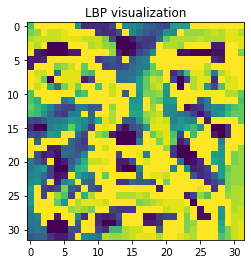

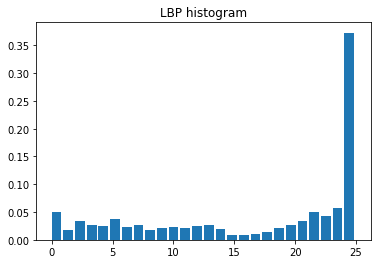

In [15]:
lbp_train = lbp_transform(train_set)
lbp_test = lbp_transform(test_set)

# LBP
plt.title("LBP visualization")
plt.imshow(lbp_train[0])
plt.show()

# histogram
plt.title("LBP histogram")
plt.hist(lbp_train[0].ravel(), bins=int(lbp_train.max()+1), density=True, width=0.8)
plt.show()

In [16]:
svm_agent.train(lbp_train, train_set.labels)

/home/zzy/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
svm_agent.test(lbp_test, test_set.labels)

Accuracy:0.9979296066252588


In [18]:
svm_agent.hyper_tune(lbp_train, train_set.labels)
svm_agent.test(lbp_test, test_set.labels)

Best parameters: {'C': 1}
Accuracy:0.9979296066252588


/home/zzy/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## HOG##

In [19]:
svm_agent.reset()

hog_train, hog_images_train = hog_transform(train_set)
hog_test, hog_images_test = hog_transform(test_set)

train_loader = td.DataLoader(train_set,batch_size=1, shuffle=False)

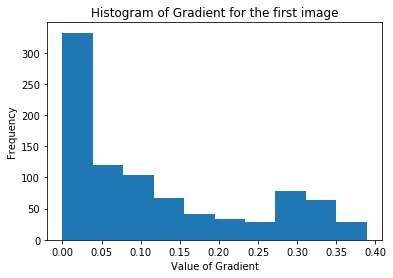

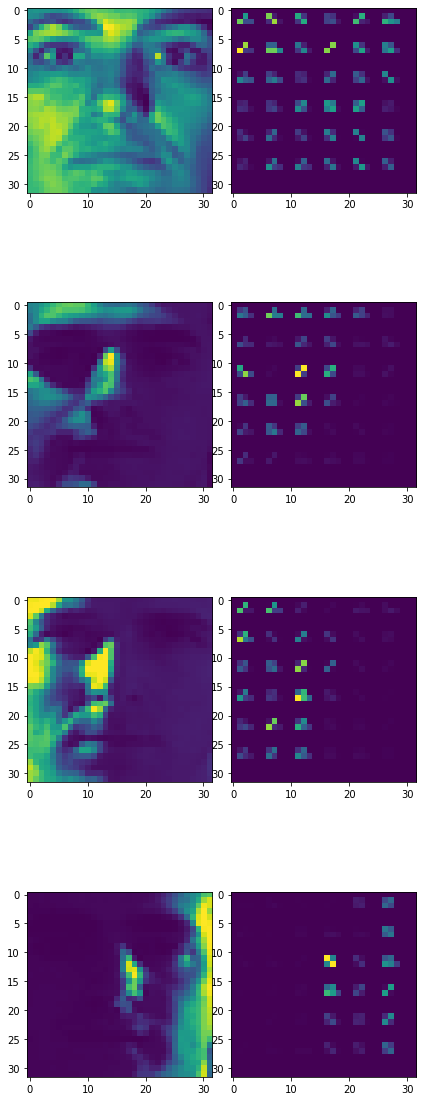

In [20]:
# Histogram for first image
plt.hist(hog_train[0])
plt.title("Histogram of Gradient for the first image")
plt.ylabel("Frequency")
plt.xlabel("Value of Gradient")

plt.show()


# Plot first four image
for i, image in enumerate(train_loader):
    if i == 4:
        break
    plt.subplot(4,2,2*i+1)
    plt.imshow(image[0].squeeze().numpy())
    hog_image_rescale = exposure.rescale_intensity(hog_images_train[i], in_range=(0, 100))
    plt.subplot(4,2,2*i+2)
    plt.imshow(hog_image_rescale)
plt.subplots_adjust(left=0,top=4, bottom=0, hspace=0.1, wspace=0.1)

In [21]:
# Train HOG
svm_agent.train(hog_train, train_set.labels)

In [22]:
# Test HOG
svm_agent.test(hog_test, test_set.labels)

Accuracy:0.9544513457556936


In [23]:
svm_agent.hyper_tune(hog_train, train_set.labels)
svm_agent.test(hog_test, test_set.labels)

Best parameters: {'C': 1}
Accuracy:0.9544513457556936


## ICA##

In [24]:
train_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=True, train=True)
test_set = ExtendedYaleFace(root="../data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=True, test=True)
svm_agent.reset()

In [25]:
ica, ica_train = ica_fit(train_set)
ica_test = ica_transform(ica, test_set)

Dimension of the batch data is torch.Size([1931, 1, 1024])
Dimension of the batch data is torch.Size([483, 1, 1024])


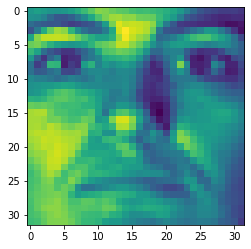

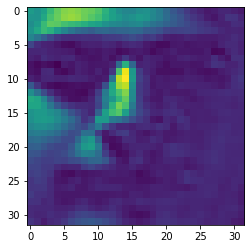

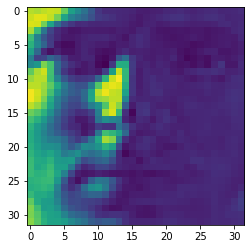

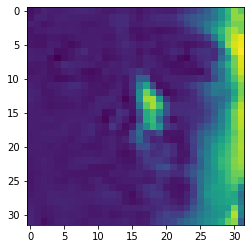

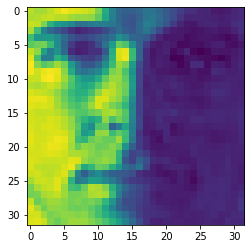

In [26]:
eigenfaces = ica.inverse_transform(ica_train).reshape(-1, 32, 32)
for i in range(5):
    plt.imshow(eigenfaces[i])
    plt.show()

In [27]:
svm_agent.train(ica_train, train_set.labels)

In [28]:
svm_agent.test(ica_test, test_set.labels)

Accuracy:0.9109730848861284


In [29]:
svm_agent.hyper_tune(ica_train, train_set.labels)
svm_agent.test(ica_test, test_set.labels)


Best parameters: {'C': 10}
Accuracy:0.9503105590062112
